In [ ]:
import random
import string
from datetime import datetime, timedelta
from dataclasses import dataclass

@dataclass
class AtomicTrack:
    index: str
    name: str
    artist: str
    publisher: str
    url: str
    time: str
    links: list[str]

    def __hash__(self):
        return hash(self.index)  # Uses the unique index as hash


@dataclass
class CompoundTrack:
    index: str
    name: str
    artist: str
    publisher: str
    url: str
    time: str
    links: list[str]
    binded_atoms: list[AtomicTrack]
    invisible_atoms: list[AtomicTrack]

    def __hash__(self):
        return hash(self.index)  # Uses the unique index as hash


@dataclass
class Set:
    name: str
    date_published: str
    num_tracks: str
    url_link: str
    tracks: list[CompoundTrack]

In [20]:
# NB: ChatGPT Code!!

def random_string(length=8):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

def random_url():
    return f"https://example.com/{random_string(10)}"

def random_time():
    return f"{random.randint(0, 5)}:{random.randint(0, 59):02d}"  # Random duration in minutes:seconds

def generate_atomic_track(index):
    return AtomicTrack(
        index=f"AT-{index}",
        name=f"AtomicTrack-{random_string(6)}",
        artist=f"Artist-{random_string(5)}",
        publisher=f"Publisher-{random_string(4)}",
        url=random_url(),
        time=random_time(),
        links=[random_url() for _ in range(random.randint(1, 3))]
    )

def generate_compound_track(index):
    binded_atoms = [generate_atomic_track(i) for i in range(random.randint(1, 3))]
    invisible_atoms = [generate_atomic_track(i + 10) for i in range(random.randint(0, 2))]
    return CompoundTrack(
        index=f"CT-{index}",
        name=f"CompoundTrack-{random_string(6)}",
        artist=f"Artist-{random_string(5)}",
        publisher=f"Publisher-{random_string(4)}",
        url=random_url(),
        time=random_time(),
        links=[random_url() for _ in range(random.randint(1, 3))],
        binded_atoms=binded_atoms,
        invisible_atoms=invisible_atoms
    )

def generate_set(name, num_tracks):
    date_published = (datetime.now() - timedelta(days=random.randint(0, 365))).strftime("%Y-%m-%d")
    url_link = random_url()
    tracks = [generate_compound_track(i) for i in range(num_tracks)]
    return Set(name, date_published, str(num_tracks), url_link, tracks)

# Generate a synthetic dataset with 5 songs
synthetic_set = generate_set("Synthwave Collection", 5)

# Example output
print(synthetic_set)

Set(name='Synthwave Collection', date_published='2024-09-27', num_tracks='5', url_link='https://example.com/WybV1nsyCI', tracks=[CompoundTrack(index='CT-0', name='CompoundTrack-Dm2s2X', artist='Artist-J2tIK', publisher='Publisher-G7dT', url='https://example.com/KmAbRmzEZm', time='5:58', links=['https://example.com/b6NuX23rRI', 'https://example.com/7EyQVqOLTD', 'https://example.com/61myhszmg2'], binded_atoms=[AtomicTrack(index='AT-0', name='AtomicTrack-2x71eT', artist='Artist-GOL1X', publisher='Publisher-yMcP', url='https://example.com/iGt9IYqabU', time='5:59', links=['https://example.com/j9jUT6DDlv']), AtomicTrack(index='AT-1', name='AtomicTrack-ydOPZg', artist='Artist-LodND', publisher='Publisher-WfNg', url='https://example.com/HEpmkt4R4f', time='3:44', links=['https://example.com/yPOwjHVUdT']), AtomicTrack(index='AT-2', name='AtomicTrack-XHXnl1', artist='Artist-4t3DH', publisher='Publisher-1zPn', url='https://example.com/SGnFwNK6mD', time='1:08', links=['https://example.com/5wkPHOU63

In [42]:
from graphviz import Digraph


def trace(compound_song):
    # builds a set of all nodes and edges in a graph
    nodes, binded_edges, mashed_edges = set(), set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.binded_atoms:
                nodes.add(child)
                binded_edges.add((child, v))
            for child in v.invisible_atoms:
                nodes.add(child)
                mashed_edges.add((child, v))
    build(compound_song)
    return nodes, binded_edges, mashed_edges

def draw_dot(compound_song):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) # LR = left to right

    nodes, binded_edges, mashed_edges = trace(compound_song)
    for n in nodes:
        # Get the id of the node
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label= "{name %s | index %s | time %s}" % (n.name, n.index, n.time), shape='record')
        if len(n.binded_atoms) != 0:
            identifier = n.name + " binded with"
            # if this compound track has some binded atoms, create a node indicating it
            dot.node(name=identifier, label = "binded with")
            # and connect this node to it
            dot.edge(identifier, uid)
        if len(n.invisible_atoms) != 0:
            identifier = n.name + " mashup with"
            # if this compound track has some binded atoms, create a node indicating it
            dot.node(name=identifier, label = "mashup with")
            # and connect this node to it
            dot.edge(identifier, uid)
    for node in nodes:
        print(type(node))
    for n1, n2 in binded_edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), n2.name + " binded with")
    for n1, n2 in mashed_edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), n2.name + " mashup with")
    return dot

In [25]:
print(synthetic_set.tracks[0])

CompoundTrack(index='CT-0', name='CompoundTrack-Dm2s2X', artist='Artist-J2tIK', publisher='Publisher-G7dT', url='https://example.com/KmAbRmzEZm', time='5:58', links=['https://example.com/b6NuX23rRI', 'https://example.com/7EyQVqOLTD', 'https://example.com/61myhszmg2'], binded_atoms=[AtomicTrack(index='AT-0', name='AtomicTrack-2x71eT', artist='Artist-GOL1X', publisher='Publisher-yMcP', url='https://example.com/iGt9IYqabU', time='5:59', links=['https://example.com/j9jUT6DDlv']), AtomicTrack(index='AT-1', name='AtomicTrack-ydOPZg', artist='Artist-LodND', publisher='Publisher-WfNg', url='https://example.com/HEpmkt4R4f', time='3:44', links=['https://example.com/yPOwjHVUdT']), AtomicTrack(index='AT-2', name='AtomicTrack-XHXnl1', artist='Artist-4t3DH', publisher='Publisher-1zPn', url='https://example.com/SGnFwNK6mD', time='1:08', links=['https://example.com/5wkPHOU63A'])], invisible_atoms=[AtomicTrack(index='AT-10', name='AtomicTrack-Pg1SCO', artist='Artist-CpjO8', publisher='Publisher-jM55', 

<class '__main__.AtomicTrack'>
<class '__main__.AtomicTrack'>
<class '__main__.CompoundTrack'>
<class '__main__.AtomicTrack'>
<class '__main__.AtomicTrack'>
<class '__main__.AtomicTrack'>


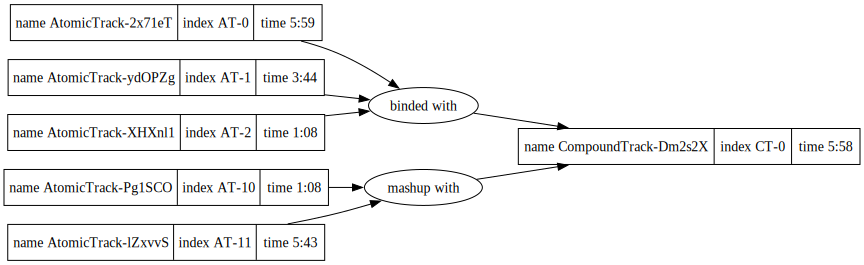

In [43]:
draw_dot(synthetic_set.tracks[0])